### Additives Analysis

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#### General Overview of Data

In [2]:
df = pd.read_csv('ingredient.csv', delimiter=',')
allRow, allCol = df.shape

## Getting General Overview of the Data

print(f'There are {allRow} rows and {allCol} columns')

df.describe()
df.head(5)

There are 214 rows and 9 columns


,a,b,c,d,e,f,g,h,i
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00


#### Histogram

<Figure size 1200x1400 with 0 Axes>

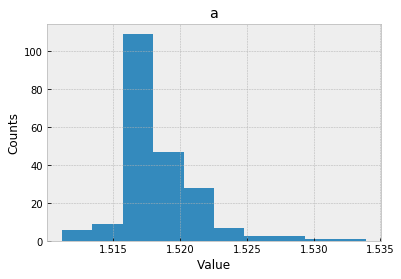

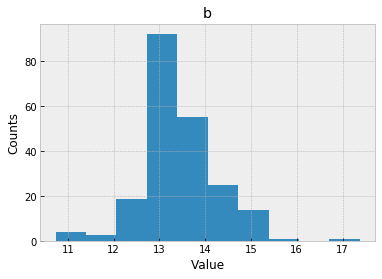

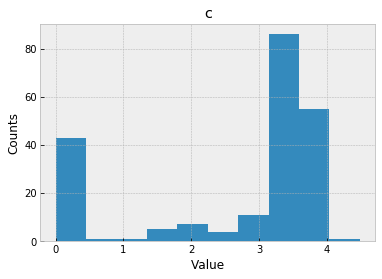

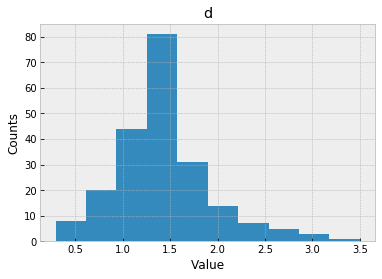

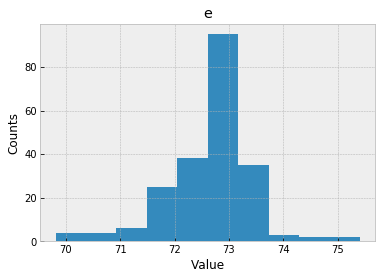

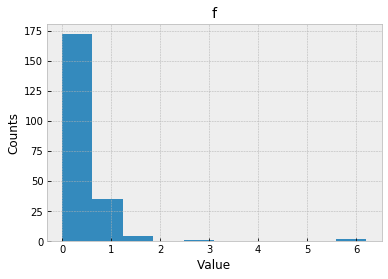

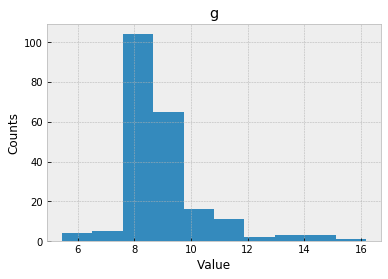

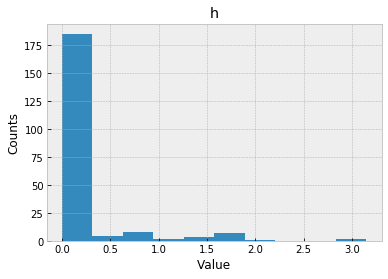

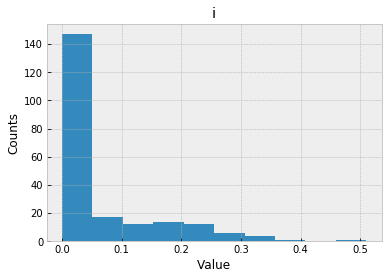

In [3]:
# To show the distribution of each additives (count vs value)

plt.figure(figsize=(6,7), dpi=200)

plt.style.use('bmh')
for x in df.columns:
    plt.figure()
    plt.hist(df[x])
    plt.title(x)
    plt.xlabel('Value')
    plt.ylabel('Counts')

plt.show()

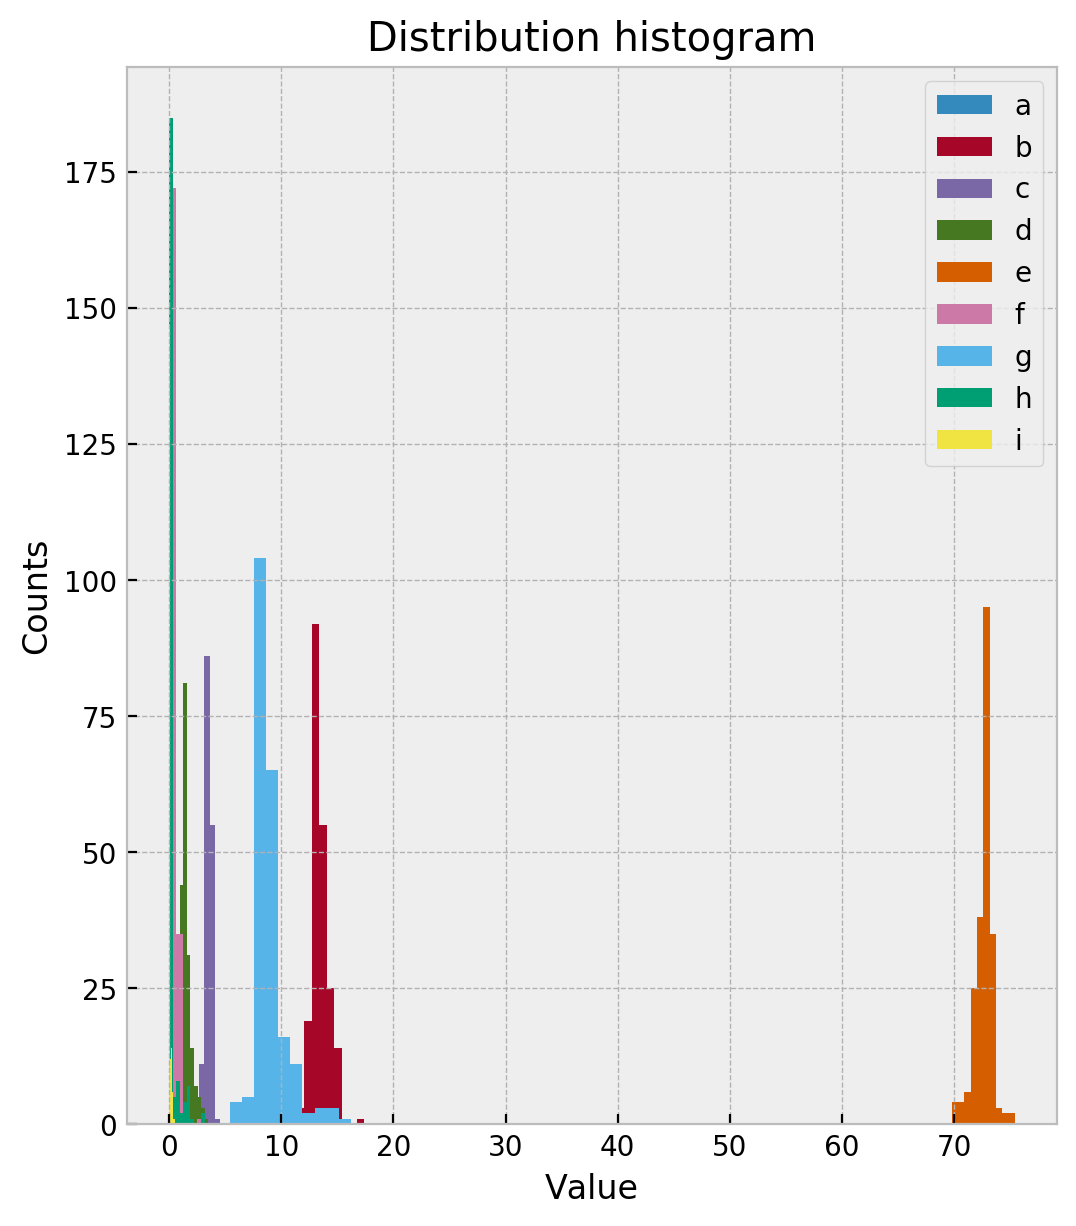

In [4]:
# To show the distribution of all ingredients

plt.figure(figsize=(6,7), dpi=200)

plt.style.use('bmh')
for x in df.columns:
    plt.hist(df[x])
    plt.title("Distribution histogram")
    plt.xlabel('Value')
    plt.ylabel('Counts')
plt.legend(df.columns)

plt.show()

#### Correlation Matrix

<Figure size 1600x1000 with 0 Axes>

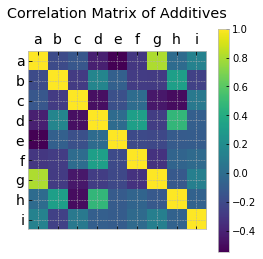

In [5]:
# Correlation Matrix
'''A correlation matrix is a table showing correlation
coefficients between variables.
Each cell in the table shows the correlation between 2 variables. 
A correlation matrix is used as a way to summarize data, as an input
into a more advanced analysis, and as a diagnostic for advanced analyses.'''

plt.figure(figsize=(8,5), dpi=200)
plt.style.use('bmh')

plt.matshow(df.corr())
plt.xticks(range(df.shape[1]), df.columns, fontsize=14)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
plt.colorbar()
plt.title("Correlation Matrix of Additives", y=1.15)

plt.show()

#### Clustering Test of 2 additives ( 'a' & 'g' )

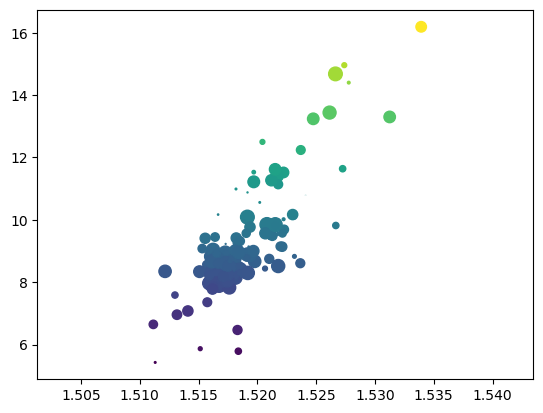

In [6]:
# Clustering is done based on prior analysis

# Clustering between 2 additives

# Additive 'a' & 'g' are chosen for the clustering
plt.style.use('default')
N = 50
x = df.a
y = df.g
colors = 215
area = (10 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=df.g)
plt.show()

#### Clustering of all additives

In [9]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    plt.style.use('seaborn-deep')
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

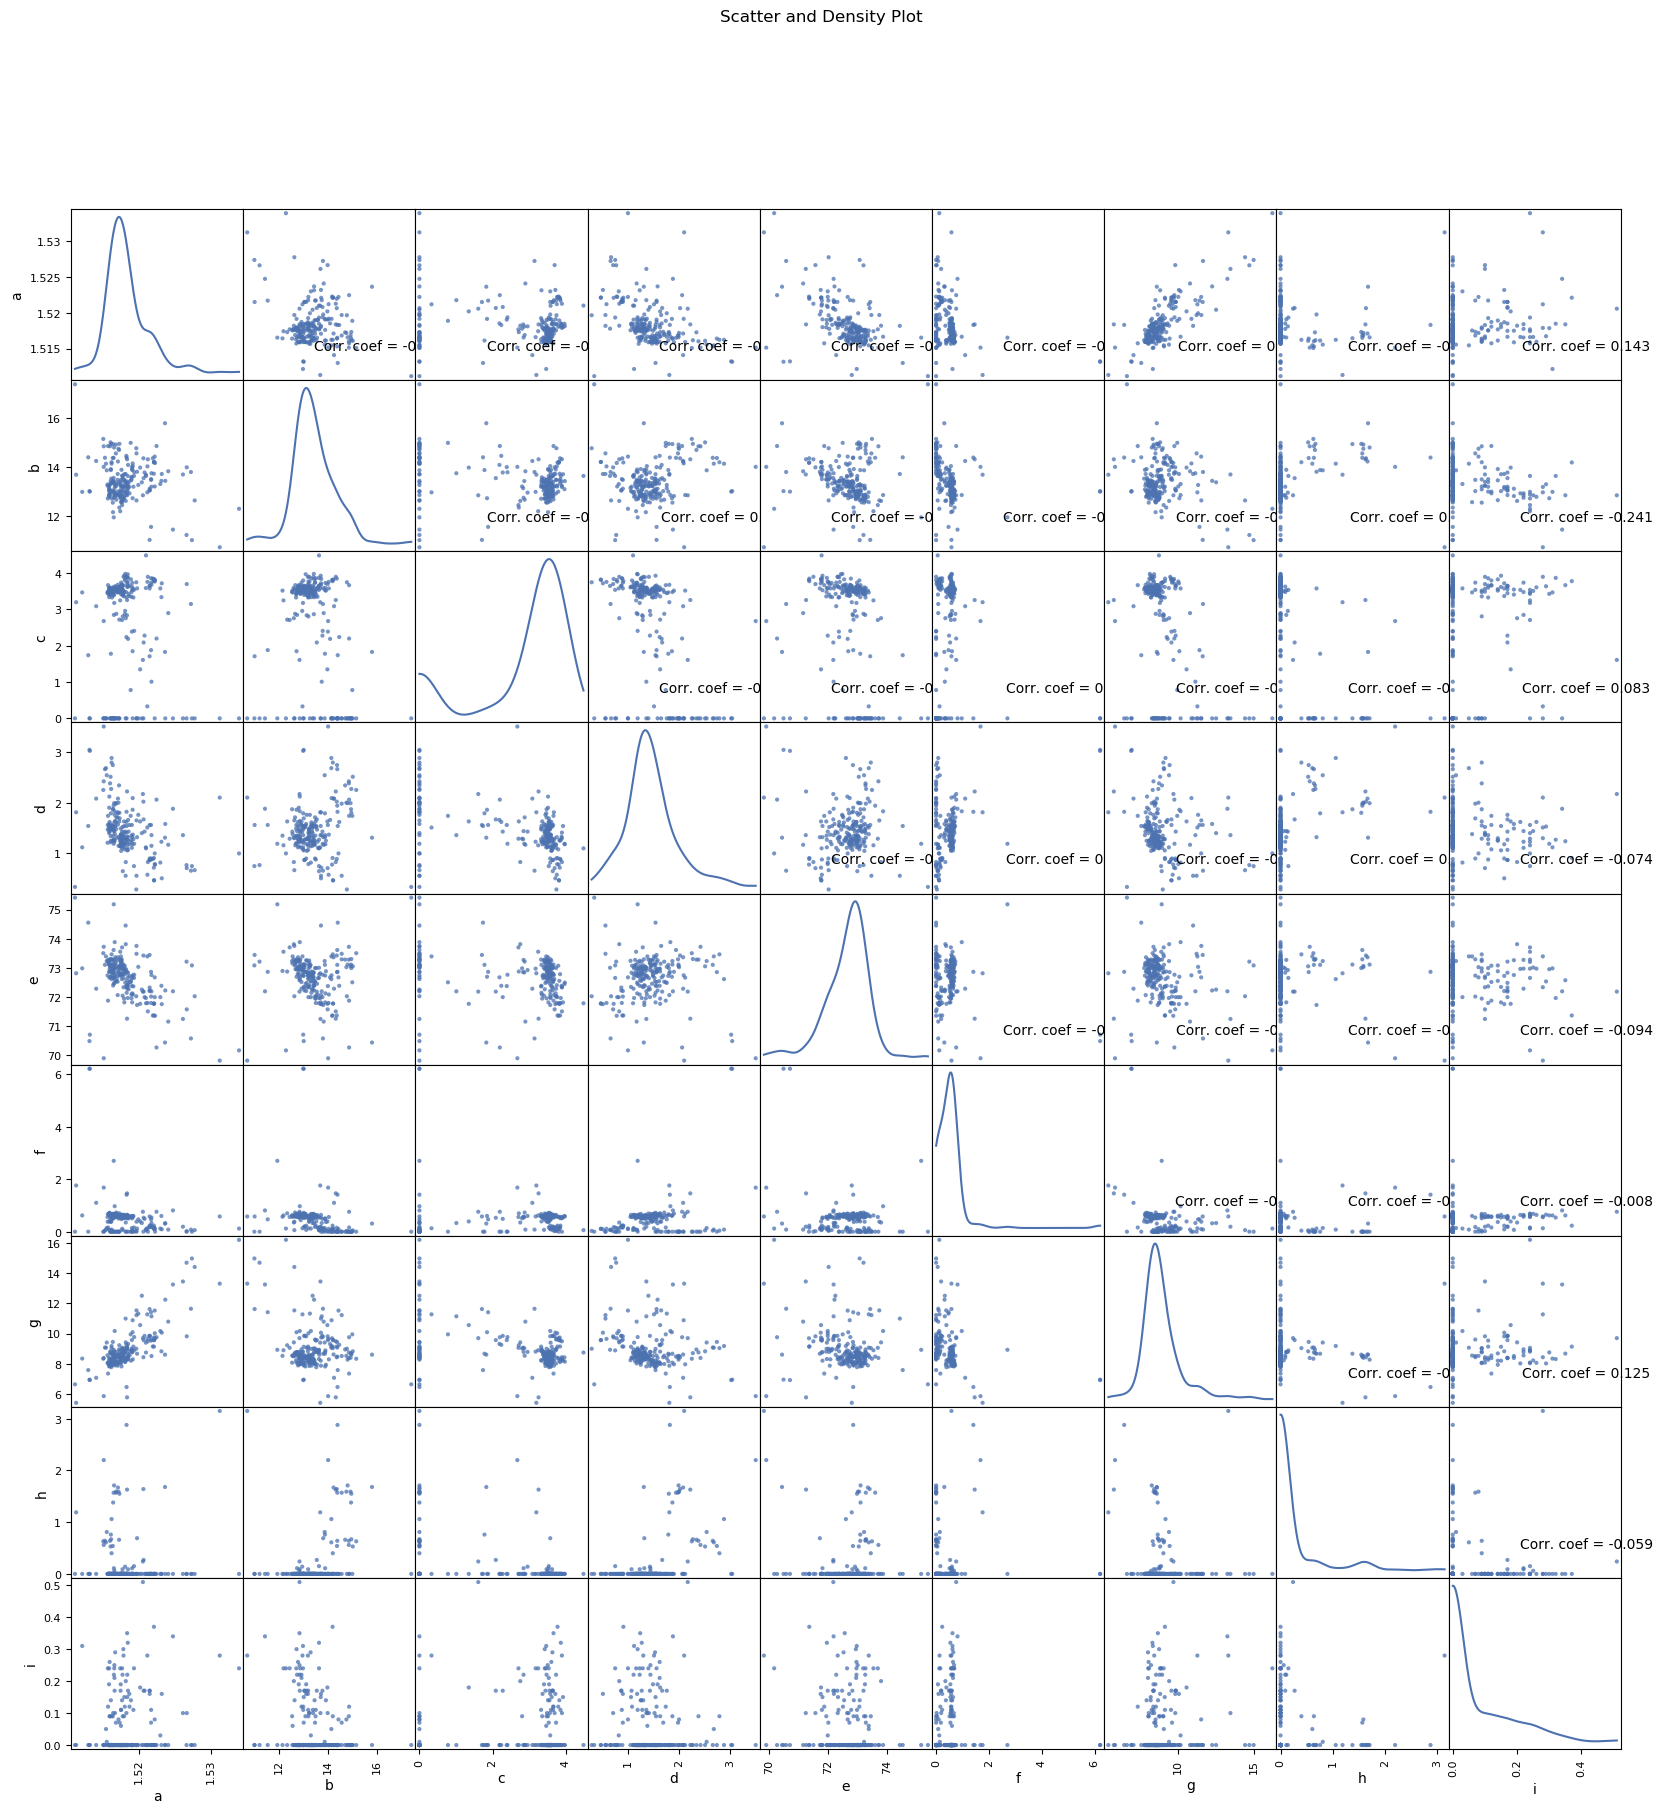

In [10]:
plotScatterMatrix(df, 20,10)